[INFO] Loaded 22 descriptor(s) from ./mapping_schemes
Selected mapping: matlab_mapping_357
Score: 2
[[1.16008217 1.15842099 1.15673286 ... 2.253194   2.25319458 2.25319503]]


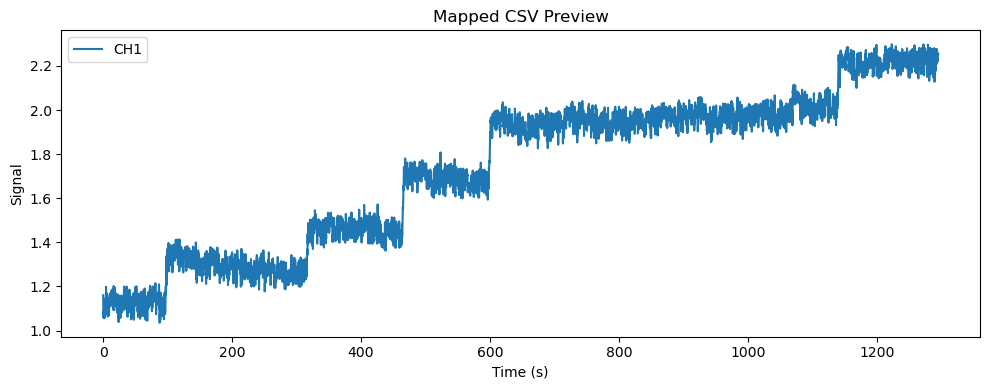

✅ Saved standardized data to: output\E033022_01_FVol.mat


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
#filepath =  "./downloads/E033022_01_BP.mat"
#filepath = "./downloads/E033022_01_EFEUSEMG.mat"
#filepath = "./downloads/E033022_01_EUSEMG.mat"  
filepath = "./downloads/E033022_01_FVol.mat"  # Example file path
#filepath = "./downloads/E033022_01_Vol.mat"

filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the other csv mapping schemes works well on this CSV file
result = match_best_mapping(descriptors, filepath, sparc_id=357)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])


# Preview signal
time = result['result']['time']
signals = result['result']['signals']

print(signals)

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("./output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_17660\3565344954.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\MaxHaberbusch\anaconda3\envs\xlstm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


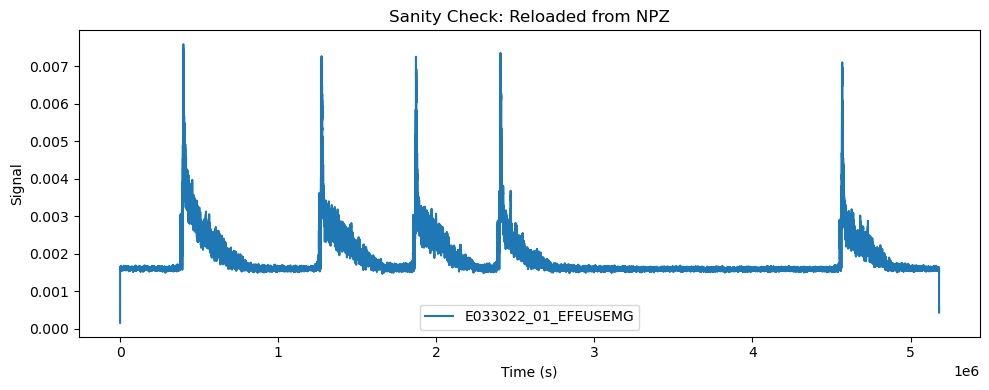

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': '.mat', 'database_id': 'unknown', 'sampling_frequency': None, 'channel_names': ['E033022_01_EFEUSEMG'], 'channel_units': ['unknown'], 'version': 'v1.0', 'upload_date': '2025-07-30', 'conversion_date': '2025-07-30', 'auto_mapped': True, 'doi': 'unknown', 'original_file_name': 'E033022_01_EFEUSEMG.mat', 'sparc_subject_id': 'unknown', 'species': 'unknown', 'anatomical_location': 'unknown', 'modality': 'emg', 'experimenter': ['unknown'], 'institution': 'unknown', 'sweep_mode': False, 'notes': 'Mapped using SPARCFUSE'}
shape of time: (5180000,)
shape of signals: (1, 5180000)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("./output/E033022_01_EFEUSEMG.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])

print("shape of time:", time.shape)
print("shape of signals:", signals.shape)